In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.model_selection as sk
import matplotlib.pyplot as plt

from tensorflow.keras import layers

In [2]:
data = pd.read_csv(r'C:\Users\Andrew\Downloads\ETH-USD.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10


In [4]:
features = data.drop(columns=['Date'])
print(len(features))
features = features.dropna()
print(len(features))

2181
2177


In [5]:
buy = []
for i in range(0, len(features)):
    if(i+4<len(features)):
        if(features.iloc[i]['Open'] < features.iloc[i+4]['Close']):
            buy.append(1)
        else:
            buy.append(0)
    else:
        buy.append(0)
features

,Open,High,Low,Close,Adj Close,Volume
0,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...
2176,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2177,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2178,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10
2179,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10


In [6]:
five_day_features = features

open_1 = []
high_1 = []
low_1 = []
close_1 = []
adj_close_1 = []
volume_1 = []

open_2 = []
high_2 = []
low_2 = []
close_2 = []
adj_close_2 = []
volume_2 = []

open_3 = []
high_3 = []
low_3 = []
close_3 = []
adj_close_3 = []
volume_3 = []

open_4 = []
high_4 = []
low_4 = []
close_4 = []
adj_close_4 = []
volume_4 = []

open_5 = []
high_5 = []
low_5 = []
close_5 = []
adj_close_5 = []
volume_5 = []

for i in range(0, len(features)):
    if i > 4:
        open_1.append(features.iloc[i-5]['Open'])
        high_1.append(features.iloc[i-5]['High'])
        low_1.append(features.iloc[i-5]['Low'])
        close_1.append(features.iloc[i-5]['Close'])
        adj_close_1.append(features.iloc[i-5]['Adj Close'])
        volume_1.append(features.iloc[i-5]['Volume'])
        
        open_2.append(features.iloc[i-4]['Open'])
        high_2.append(features.iloc[i-4]['High'])
        low_2.append(features.iloc[i-4]['Low'])
        close_2.append(features.iloc[i-4]['Close'])
        adj_close_2.append(features.iloc[i-4]['Adj Close'])
        volume_2.append(features.iloc[i-4]['Volume'])
        
        open_3.append(features.iloc[i-3]['Open'])
        high_3.append(features.iloc[i-3]['High'])
        low_3.append(features.iloc[i-3]['Low'])
        close_3.append(features.iloc[i-3]['Close'])
        adj_close_3.append(features.iloc[i-3]['Adj Close'])
        volume_3.append(features.iloc[i-3]['Volume'])
        
        open_4.append(features.iloc[i-2]['Open'])
        high_4.append(features.iloc[i-2]['High'])
        low_4.append(features.iloc[i-2]['Low'])
        close_4.append(features.iloc[i-2]['Close'])
        adj_close_4.append(features.iloc[i-2]['Adj Close'])
        volume_4.append(features.iloc[i-2]['Volume'])
        
        open_5.append(features.iloc[i-1]['Open'])
        high_5.append(features.iloc[i-1]['High'])
        low_5.append(features.iloc[i-1]['Low'])
        close_5.append(features.iloc[i-1]['Close'])
        adj_close_5.append(features.iloc[i-1]['Adj Close'])
        volume_5.append(features.iloc[i-1]['Volume'])

five_day_features = five_day_features.drop([0,1,2,3,4])
five_day_features['open_1'] = open_1
five_day_features['high_1'] = high_1
five_day_features['low_1'] = low_1
five_day_features['close_1'] = close_1
five_day_features['adj_close_1'] = adj_close_1
five_day_features['volume_1'] = volume_1

five_day_features['open_2'] = open_2
five_day_features['high_2'] = high_2
five_day_features['low_2'] = low_2
five_day_features['close_2'] = close_2
five_day_features['adj_close_2'] = adj_close_2
five_day_features['volume_2'] = volume_2

five_day_features['open_3'] = open_3
five_day_features['high_3'] = high_3
five_day_features['low_3'] = low_3
five_day_features['close_3'] = close_3
five_day_features['adj_close_3'] = adj_close_3
five_day_features['volume_3'] = volume_3

five_day_features['open_4'] = open_4
five_day_features['high_4'] = high_4
five_day_features['low_4'] = low_4
five_day_features['close_4'] = close_4
five_day_features['adj_close_4'] = adj_close_4
five_day_features['volume_4'] = volume_4

five_day_features['open_5'] = open_5
five_day_features['high_5'] = high_5
five_day_features['low_5'] = low_5
five_day_features['close_5'] = close_5
five_day_features['adj_close_5'] = adj_close_5
five_day_features['volume_5'] = volume_5

five_day_features

,Open,High,Low,Close,Adj Close,Volume,open_1,high_1,low_1,close_1,...,low_4,close_4,adj_close_4,volume_4,open_5,high_5,low_5,close_5,adj_close_5,volume_5
5,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06,2.831620,3.536610,2.521120,2.772120,...,0.636546,0.708448,0.708448,4.052830e+05,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
6,1.222240,1.965070,1.171990,1.827670,1.827670,4.068680e+06,2.793760,2.798810,0.714725,0.753325,...,0.663235,1.067860,1.067860,1.463100e+06,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06
7,1.810920,2.261880,1.754750,1.827870,1.827870,4.637030e+06,0.706136,0.879810,0.629191,0.701897,...,0.883608,1.217440,1.217440,2.150620e+06,1.222240,1.965070,1.171990,1.827670,1.827670,4.068680e+06
8,1.802890,1.877240,1.570980,1.688900,1.688900,2.554360e+06,0.713989,0.729854,0.636546,0.708448,...,1.171990,1.827670,1.827670,4.068680e+06,1.810920,2.261880,1.754750,1.827870,1.827870,4.637030e+06
9,1.684350,1.695240,1.089810,1.566030,1.566030,3.550790e+06,0.708087,1.131410,0.663235,1.067860,...,1.754750,1.827870,1.827870,4.637030e+06,1.802890,1.877240,1.570980,1.688900,1.688900,2.554360e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10,1876.881348,1917.597900,1855.590820,1898.825195,...,1722.050781,1787.510742,1787.510742,1.736860e+10,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,2.125336e+10
2177,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10,1900.194336,1988.336426,1883.012573,1895.552124,...,1759.023315,1990.970825,1990.970825,2.125336e+10,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2178,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10,1893.053589,1916.118042,1807.909912,1817.296631,...,1954.297852,2025.202759,2025.202759,1.749548e+10,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2179,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10,1819.082031,1836.998047,1722.050781,1787.510742,...,2000.436279,2124.776611,2124.776611,1.620039e+10,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10


In [7]:
for i in range(0,5):
    del buy[0]
five_day_features.dropna()

,Open,High,Low,Close,Adj Close,Volume,open_1,high_1,low_1,close_1,...,low_4,close_4,adj_close_4,volume_4,open_5,high_5,low_5,close_5,adj_close_5,volume_5
5,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06,2.831620,3.536610,2.521120,2.772120,...,0.636546,0.708448,0.708448,4.052830e+05,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
6,1.222240,1.965070,1.171990,1.827670,1.827670,4.068680e+06,2.793760,2.798810,0.714725,0.753325,...,0.663235,1.067860,1.067860,1.463100e+06,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06
7,1.810920,2.261880,1.754750,1.827870,1.827870,4.637030e+06,0.706136,0.879810,0.629191,0.701897,...,0.883608,1.217440,1.217440,2.150620e+06,1.222240,1.965070,1.171990,1.827670,1.827670,4.068680e+06
8,1.802890,1.877240,1.570980,1.688900,1.688900,2.554360e+06,0.713989,0.729854,0.636546,0.708448,...,1.171990,1.827670,1.827670,4.068680e+06,1.810920,2.261880,1.754750,1.827870,1.827870,4.637030e+06
9,1.684350,1.695240,1.089810,1.566030,1.566030,3.550790e+06,0.708087,1.131410,0.663235,1.067860,...,1.754750,1.827870,1.827870,4.637030e+06,1.802890,1.877240,1.570980,1.688900,1.688900,2.554360e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10,1876.881348,1917.597900,1855.590820,1898.825195,...,1722.050781,1787.510742,1787.510742,1.736860e+10,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,2.125336e+10
2177,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10,1900.194336,1988.336426,1883.012573,1895.552124,...,1759.023315,1990.970825,1990.970825,2.125336e+10,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2178,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10,1893.053589,1916.118042,1807.909912,1817.296631,...,1954.297852,2025.202759,2025.202759,1.749548e+10,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2179,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10,1819.082031,1836.998047,1722.050781,1787.510742,...,2000.436279,2124.776611,2124.776611,1.620039e+10,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10


In [8]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [10]:
#len(buy)

In [11]:
#X_train, X_test, y_train, y_test = sk.train_test_split(features,
                                                   # buy,
                                                   # random_state=42)

In [12]:
#X_train['buy'] = y_train
#X_test['buy'] = y_test
#X_test

In [13]:
buy_df = pd.DataFrame(buy,columns=['buy-sell'])


In [14]:
print(len(buy_df))
buy_df = buy_df.dropna()
print(len(buy_df))

2172
2172


In [15]:
history = model.fit(
    five_day_features,
    buy_df,
    epochs=10)

Epoch 1/10
68/68 [==============================] - 1s 3ms/step - loss: 124794296.0000 - binary_accuracy: 0.4744
Epoch 2/10
68/68 [==============================] - 0s 3ms/step - loss: 36938292.0000 - binary_accuracy: 0.4705
Epoch 3/10
68/68 [==============================] - 0s 3ms/step - loss: 33227224.0000 - binary_accuracy: 0.4724
Epoch 4/10
68/68 [==============================] - 0s 3ms/step - loss: 31454654.0000 - binary_accuracy: 0.4671
Epoch 5/10
68/68 [==============================] - 0s 3ms/step - loss: 38001768.0000 - binary_accuracy: 0.4675
Epoch 6/10
68/68 [==============================] - 0s 2ms/step - loss: 64880940.0000 - binary_accuracy: 0.4738
Epoch 7/10
68/68 [==============================] - 0s 3ms/step - loss: 36223804.0000 - binary_accuracy: 0.4708
Epoch 8/10
68/68 [==============================] - 0s 3ms/step - loss: 30674398.0000 - binary_accuracy: 0.4712
Epoch 9/10
68/68 [==============================] - 0s 3ms/step - loss: 42519744.0000 - binary_accuracy

In [16]:
print(type(features))
print(type(buy_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy'])

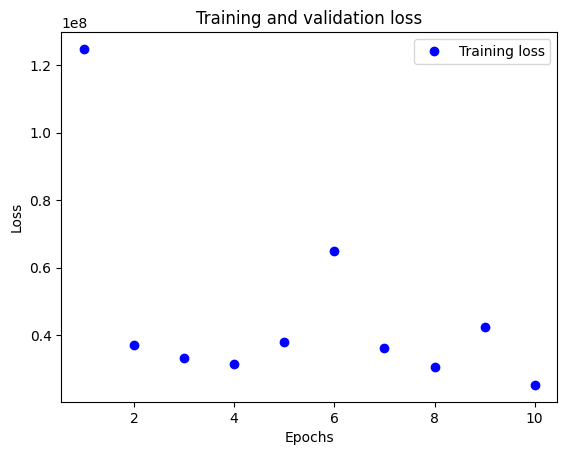

In [19]:
acc = history_dict['binary_accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
res = model.predict(five_day_features)

In [22]:
res

array([[-7.63085625e+04, -5.61477148e+04],
       [-1.31874062e+05, -3.80801367e+04],
       [-1.99314828e+05, -1.08218766e+05],
       ...,
       [-5.63206464e+08, -5.88744960e+08],
       [-2.53922560e+08, -2.64823040e+08],
       [-6.16701184e+08, -5.16718080e+08]], dtype=float32)